In [1]:
import time
import numpy as np
import pandas as pd
import tushare as ts
from talib.abstract import *

import matplotlib.pyplot as plt

## External Data

In [2]:
#arig = pd.read_csv('clean_argiculture.csv')
bi = pd.read_csv('clean_bondindex.csv')
cur = pd.read_csv('clean_currency.csv')
em = pd.read_csv('clean_energy_metals.csv')

In [3]:
#ext_dt = arig.merge(bi, left_on='Date', right_on='Date') \
#             .merge(cur, left_on='Date', right_on='Date') \
#             .merge(em, left_on='Date', right_on='Date')
ext_dt = bi.merge(cur, left_on='Date', right_on='Date') \
           .merge(em, left_on='Date', right_on='Date')
ext_dt.Date = ext_dt.Date.astype('str')

In [4]:
col = list(ext_dt.columns)
col[0] = 'trade_date'
ext_dt.columns = col

In [5]:
ext_dt

,trade_date,US High Yied,US Investment Grade,Emerging Investment Grade,Emerging High Yield OAS,Emerging Investment Grade OAS,US High Yield OAS,US Investment Grade OAS,US 10 Year -2 Year Gov Spread,USDZAR BGN Curncy (L4),...,NZDUSD Curncy (L1),GBPUSD Curncy (R2),EURUSD Curncy (L1),Crude Oil,Natural Gas,Aluminum,Copper,Gold,Nickel,Silver
0,20200204,2188.9700,204.39,526.8440,6.39,1.36,3.72,1.100000,18.4134,14.7831,...,0.6490,1.3031,1.1044,49.61,1.872,1686.0,5618.0,1552.92,12830.0,17.5945
1,20200203,2184.9099,205.32,528.2544,6.55,1.40,3.83,1.130000,16.8204,14.8843,...,0.6462,1.2995,1.1060,50.11,1.819,1686.5,5525.0,1576.73,12725.0,17.6822
2,20200131,2183.3501,205.17,528.2468,6.53,1.40,3.90,1.130000,18.7634,15.0282,...,0.6464,1.3206,1.1093,51.56,1.841,1722.0,5567.0,1589.16,12850.0,18.0425
3,20200130,2183.6799,204.89,527.2715,6.48,1.39,3.82,1.110000,16.8845,14.7648,...,0.6488,1.3093,1.1032,52.14,1.829,1731.0,5587.5,1574.28,12620.0,17.8398
4,20200129,2187.2000,204.86,526.5925,6.38,1.38,3.71,1.090000,16.5184,14.6167,...,0.6527,1.3021,1.1010,53.33,1.865,1737.0,5641.0,1576.83,12550.0,17.5585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,20140514,1649.3300,156.53,402.2607,5.89,1.90,3.47,1.054762,217.1720,10.2914,...,0.8668,1.6767,1.3715,102.37,5.052,1809.0,6920.0,1305.97,20030.0,19.7929
1436,20140513,1648.1500,155.79,401.0304,5.88,1.88,3.44,1.054286,222.5910,10.3089,...,0.8628,1.6826,1.3704,101.70,5.029,1781.0,6845.0,1293.63,21000.0,19.5400
1437,20140512,1646.8600,155.45,400.0514,5.86,1.89,3.42,1.053810,226.2120,10.3580,...,0.8620,1.6868,1.3757,100.59,5.034,1787.0,6879.0,1295.80,20925.0,19.5424
1438,20140509,1645.1899,155.66,400.3427,5.87,1.91,3.47,1.053333,223.6310,10.3481,...,0.8613,1.6851,1.3758,99.99,5.064,1761.5,6745.0,1288.91,19905.0,19.1696


## Internal Data

In [6]:
ts.set_token('046f78c6fb6642dfc1c52c0e43e7664fe3c90e10ea0c9275b5b05f09')
pro = ts.pro_api()
df = pro.daily(ts_code='000001.SZ', start_date='20150101', end_date='20200204')
df.sort_index(ascending=False, inplace=True)
df.head()

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
1236,000001.SZ,20150105,15.99,16.28,15.60,16.02,15.84,0.18,1.14,2860436.43,4.565388e+06
1235,000001.SZ,20150106,15.85,16.39,15.55,15.78,16.02,-0.24,-1.50,2166421.40,3.453446e+06
1234,000001.SZ,20150107,15.56,15.83,15.30,15.48,15.78,-0.30,-1.90,1700120.67,2.634796e+06
1233,000001.SZ,20150108,15.50,15.57,14.90,14.96,15.48,-0.52,-3.36,1407714.21,2.128003e+06
1232,000001.SZ,20150109,14.90,15.87,14.71,15.08,14.96,0.12,0.80,2508500.23,3.835378e+06


In [7]:
df = pd.read_csv('sp500.csv').iloc[:1000].iloc[::-1]
df.trade_date = df.trade_date.astype('str')
df.vol = df.vol.astype('double')
df.head()

,trade_date,open,high,low,close,vol
999,20160122,1877.400024,1908.849976,1877.400024,1906.900024,4.901760e+09
998,20160125,1906.280029,1906.280029,1875.969971,1877.079956,4.401380e+09
997,20160126,1878.790039,1906.729980,1878.790039,1903.630005,4.357940e+09
996,20160127,1902.520020,1916.989990,1872.699951,1882.949951,4.754040e+09
995,20160128,1885.219971,1902.959961,1873.650024,1893.359985,4.693010e+09


In [8]:
df = df[['trade_date', 'open', 'high', 'low', 'close', 'vol']] \
     .merge(ext_dt, left_on='trade_date', right_on='trade_date')

In [9]:
df.head()

,trade_date,open,high,low,close,vol,US High Yied,US Investment Grade,Emerging Investment Grade,Emerging High Yield OAS,...,NZDUSD Curncy (L1),GBPUSD Curncy (R2),EURUSD Curncy (L1),Crude Oil,Natural Gas,Aluminum,Copper,Gold,Nickel,Silver
0,20160122,1877.400024,1908.849976,1877.400024,1906.900024,4.901760e+09,1506.55,158.97,400.4251,8.06,...,0.6493,1.4265,1.0796,32.19,3.219,1481.5,4443.0,1097.95,8700.0,14.0272
1,20160125,1906.280029,1906.280029,1875.969971,1877.079956,4.401380e+09,1509.98,159.08,400.3913,8.12,...,0.6454,1.4249,1.0849,30.34,3.212,1476.0,4417.0,1107.90,8550.0,14.2372
2,20160126,1878.790039,1906.729980,1878.790039,1903.630005,4.357940e+09,1511.83,159.15,400.8797,8.13,...,0.6499,1.4350,1.0870,31.45,3.202,1495.0,4539.0,1119.91,8670.0,14.5045
3,20160127,1902.520020,1916.989990,1872.699951,1882.949951,4.754040e+09,1514.49,159.02,401.7372,8.06,...,0.6432,1.4234,1.0893,32.30,3.201,1526.0,4590.0,1124.97,8655.0,14.4823
4,20160128,1885.219971,1902.959961,1873.650024,1893.359985,4.693010e+09,1518.29,159.01,402.7985,7.97,...,0.6480,1.4362,1.0940,33.22,3.225,1513.5,4530.0,1115.33,8590.0,14.2441


In [10]:
inputs = {
    'open': df.open.values,
    'high': df.high.values,
    'low': df.low.values,
    'close': df.close.values,
    'volume': df.vol.values
}

inputs.update(
    {key: df[key].values for key in df.columns[6:]}
)

In [11]:
def ta_indicators(inputs):
    TAI_DICT = {
        'AD': AD(inputs),
        'ADD': ADD(inputs),
        'ATAN': ATAN(inputs),
        'AVGPRICE': AVGPRICE(inputs),
        'BOP': BOP(inputs),
        'CDL2CROWS': CDL2CROWS(inputs),
        'CDL3BLACKCROWS': CDL3BLACKCROWS(inputs),
        'CDL3INSIDE': CDL3INSIDE(inputs),
        'CDL3LINESTRIKE': CDL3LINESTRIKE(inputs),
        'CDL3OUTSIDE': CDL3OUTSIDE(inputs),
        'CDL3STARSINSOUTH': CDL3STARSINSOUTH(inputs),
        'CDL3WHITESOLDIERS': CDL3WHITESOLDIERS(inputs),
        'CDLADVANCEBLOCK': CDLADVANCEBLOCK(inputs),
        'CDLBELTHOLD': CDLBELTHOLD(inputs),
        'CDLBREAKAWAY': CDLBREAKAWAY(inputs),
        'CDLCLOSINGMARUBOZU': CDLCLOSINGMARUBOZU(inputs),
        'CDLCONCEALBABYSWALL': CDLCONCEALBABYSWALL(inputs),
        'CDLCOUNTERATTACK': CDLCOUNTERATTACK(inputs),
        'CDLDOJI': CDLDOJI(inputs),
        'CDLDOJISTAR': CDLDOJISTAR(inputs),
        'CDLDRAGONFLYDOJI': CDLDRAGONFLYDOJI(inputs),
        'CDLENGULFING': CDLENGULFING(inputs),
        'CDLGAPSIDESIDEWHITE': CDLGAPSIDESIDEWHITE(inputs),
        'CDLGRAVESTONEDOJI': CDLGRAVESTONEDOJI(inputs),
        'CDLHAMMER': CDLHAMMER(inputs),
        'CDLHANGINGMAN': CDLHANGINGMAN(inputs),
        'CDLHARAMI': CDLHARAMI(inputs),
        'CDLHARAMICROSS': CDLHARAMICROSS(inputs),
        'CDLHIGHWAVE': CDLHIGHWAVE(inputs),
        'CDLHIKKAKE': CDLHIKKAKE(inputs),
        'CDLHIKKAKEMOD': CDLHIKKAKEMOD(inputs),
        'CDLHOMINGPIGEON': CDLHOMINGPIGEON(inputs),
        'CDLIDENTICAL3CROWS': CDLIDENTICAL3CROWS(inputs),
        'CDLINNECK': CDLINNECK(inputs),
        'CDLINVERTEDHAMMER': CDLINVERTEDHAMMER(inputs),
        'CDLKICKING': CDLKICKING(inputs),
        'CDLKICKINGBYLENGTH': CDLKICKINGBYLENGTH(inputs),
        'CDLLADDERBOTTOM': CDLLADDERBOTTOM(inputs),
        'CDLLONGLEGGEDDOJI': CDLLONGLEGGEDDOJI(inputs),
        'CDLLONGLINE': CDLLONGLINE(inputs),
        'CDLMARUBOZU': CDLMARUBOZU(inputs),
        'CDLMATCHINGLOW': CDLMATCHINGLOW(inputs),
        'CDLONNECK': CDLONNECK(inputs),
        'CDLPIERCING': CDLPIERCING(inputs),
        'CDLRICKSHAWMAN': CDLRICKSHAWMAN(inputs),
        'CDLRISEFALL3METHODS': CDLRISEFALL3METHODS(inputs),
        'CDLSEPARATINGLINES': CDLSEPARATINGLINES(inputs),
        'CDLSHOOTINGSTAR': CDLSHOOTINGSTAR(inputs),
        'CDLSHORTLINE': CDLSHORTLINE(inputs),
        'CDLSPINNINGTOP': CDLSPINNINGTOP(inputs),
        'CDLSTALLEDPATTERN': CDLSTALLEDPATTERN(inputs),
        'CDLSTICKSANDWICH': CDLSTICKSANDWICH(inputs),
        'CDLTAKURI': CDLTAKURI(inputs),
        'CDLTASUKIGAP': CDLTASUKIGAP(inputs),
        'CDLTHRUSTING': CDLTHRUSTING(inputs),
        'CDLTRISTAR': CDLTRISTAR(inputs),
        'CDLUNIQUE3RIVER': CDLUNIQUE3RIVER(inputs),
        'CDLUPSIDEGAP2CROWS': CDLUPSIDEGAP2CROWS(inputs),
        'CDLXSIDEGAP3METHODS': CDLXSIDEGAP3METHODS(inputs),
        'CEIL': CEIL(inputs),
        'COS': COS(inputs),
        'COSH': COSH(inputs),

        'ATR': ATR(inputs, timeperiod=14),
        'BETA': BETA(inputs, timeperiod=5),
        'CCI': CCI(inputs, timeperiod=14),
        'CMO': CMO(inputs, timeperiod=14),
        'CORREL': CORREL(inputs, timeperiod=30),
        'ADX': ADX(inputs, timeperiod=14),
        'ADXR': ADXR(inputs, timeperiod=14),
        'AROONOSC': AROONOSC(inputs, timeperiod=14),
        'ADOSC': ADOSC(inputs, fastperiod=3, slowperiod=10),
        'APO': APO(inputs, fastperiod=12, slowperiod=26, matype=0),
        
        'MFI': MFI(inputs, timeperiod=14),
        'MINUS_DI' : MINUS_DI(inputs, timeperiod=14),
        'MINUS_DM' : MINUS_DM(inputs, timeperiod=14),
        'MOM' : MOM(inputs, timeperiod=10),
        'PLUS_DI' : PLUS_DI(inputs, timeperiod=14),
        'PLUS_DM' : PLUS_DM(inputs, timeperiod=14),
        'PRO' : PPO(inputs, fastperiod=12, slowperiod=26, matype=0),
        'ROC' : ROC(inputs, timeperiod=10),
        'ROCP' : ROCP(inputs, timeperiod=10),
        'ROCR' : ROCR(inputs, timeperiod=10),
        'ROCR100' : ROCR100(inputs, timeperiod=10),
        'RSI' : RSI(inputs, timeperiod=14),
        'TRIX' : TRIX(inputs, timeperiod=30),
        'ULTOSC' :ULTOSC(inputs, timeperiod1=7, timeperiod2=14, timeperiod3=28),
        'WILLR' : WILLR(inputs, timeperiod=14),
        
        'DEMA': DEMA(inputs, timeperiod=30),
        'EMA' : EMA(inputs, timeperiod=30),
        'HT_TRENDLINE' : HT_TRENDLINE(inputs),
        'KAMA' : KAMA(inputs, timeperiod=30),
        'MA' : MA(inputs, timeperiod=30, matype=0),
        'MIDPOINT' : MIDPOINT(inputs, timeperiod=14),
        'MIDPRICE' : MIDPRICE(inputs, timeperiod=14),
        'SAR' : SAR(inputs, acceleration=0, maximum=0),
        'SAREXT' : SAREXT(inputs, startvalue=0, offsetonreverse=0, accelerationinitlong=0,
                      accelerationlong=0, accelerationmaxlong=0, accelerationinitshort=0, 
                      accelerationshort=0, accelerationmaxshort=0),
        'SMA' : SMA(inputs, timeperiod=30),
        'T3' : T3(inputs, timeperiod=5, vfactor=0),
        'TEMA' : TEMA(inputs, timeperiod=30),
        'TRIMA' : TRIMA(inputs, timeperiod=30),
        'WMA' : WMA(inputs, timeperiod=30),
        
        'OBV' : OBV(inputs),
        'NATR' : NATR(inputs, timeperiod=14),
        'TRANGE' : TRANGE(inputs),
        
        'HT_DCPERIOD' : HT_DCPERIOD(inputs),
        'HT_TRENDMODE' : HT_TRENDMODE(inputs),
        'HT_DCPHASE' : HT_DCPHASE(inputs),
        
        'LINEARREG' : LINEARREG(inputs, timeperiod=14),
        'LINEARREG_ANGLE' : LINEARREG_ANGLE(inputs, timeperiod=14),
        'LINEARREG_INTERCEPT' : LINEARREG_INTERCEPT(inputs, timeperiod=14),
        'LINEARREG_SLOPE' : LINEARREG_SLOPE(inputs, timeperiod=14),
        'STDDEV' : STDDEV(inputs, timeperiod=5, nbdev=1),
        
        'TYPPRICE' : TYPPRICE(inputs),
        'WCLPRICE' : WCLPRICE(inputs),
        
        'SINH' : SINH(inputs),
        'SQRT' : SQRT(inputs),
        'LOG10' : LOG10(inputs),
        
        
        'CDLABANDONEDBABY_0': CDLABANDONEDBABY(inputs, penetration=0),
        'CDLDARKCLOUDCOVER_0': CDLDARKCLOUDCOVER(inputs, penetration=0),
        'CDLEVENINGDOJISTAR_0': CDLEVENINGDOJISTAR(inputs, penetration=0),
        'CDLEVENINGSTAR_0': CDLEVENINGSTAR(inputs, penetration=0),
        'CDLMATHOLD_0': CDLMATHOLD(inputs, penetration=0),
        'CDLMORNINGDOJISTAR_0': CDLMORNINGDOJISTAR(inputs, penetration=0),
        'CDLMORNINGSTAR_0': CDLMORNINGSTAR(inputs, penetration=0),

        'CDLABANDONEDBABY_3': CDLABANDONEDBABY(inputs, penetration=0.3),
        'CDLDARKCLOUDCOVER_3': CDLDARKCLOUDCOVER(inputs, penetration=0.3),
        'CDLEVENINGDOJISTAR_3': CDLEVENINGDOJISTAR(inputs, penetration=0.3),
        'CDLEVENINGSTAR_3': CDLEVENINGSTAR(inputs, penetration=0.3),
        'CDLMATHOLD_3': CDLMATHOLD(inputs, penetration=0.3),
        'CDLMORNINGDOJISTAR_3': CDLMORNINGDOJISTAR(inputs, penetration=0.3),
        'CDLMORNINGSTAR_3': CDLMORNINGSTAR(inputs, penetration=0.3),

        'CDLABANDONEDBABY_5': CDLABANDONEDBABY(inputs, penetration=0.5),
        'CDLDARKCLOUDCOVER_5': CDLDARKCLOUDCOVER(inputs, penetration=0.5),
        'CDLEVENINGDOJISTAR_5': CDLEVENINGDOJISTAR(inputs, penetration=0.5),
        'CDLEVENINGSTAR_5': CDLEVENINGSTAR(inputs, penetration=0.5),
        'CDLMATHOLD_5': CDLMATHOLD(inputs, penetration=0.5),
        'CDLMORNINGDOJISTAR_5': CDLMORNINGDOJISTAR(inputs, penetration=0.5),
        'CDLMORNINGSTAR_5': CDLMORNINGSTAR(inputs, penetration=0.5),
    }

    inphase, quadrature = HT_PHASOR(inputs)
    sine, leadsine = HT_SINE(inputs)
    macd_macd, macd_macdsignal, macd_macdhist = MACD(inputs,fastperiod=12, slowperiod=26,signalperiod=9)
    macdext_macd, macdext_macdsignal, macdext_macdhist = MACDEXT(inputs, fastperiod=12, fastmatype=0, slowperiod=26, 
                                                                 slowmatype=0, signalperiod=9, signalmatype=0)
    macdfix_macd, macdfix_macdsignal, macdfix_macdhist = MACDFIX(inputs, signalperiod=9)
    slowk, slowd = STOCH(inputs, fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)
    fastk, fastd = STOCHF(inputs, fastk_period=5, fastd_period=3, fastd_matype=0)
    fastk_rsi, fastd_rsi = STOCHRSI(inputs, timeperiod=14, fastk_period=5, fastd_period=3, fastd_matype=0)
    bu, bm, bl = BBANDS(inputs, timeperiod=5, nbdevup=2, nbdevdn=2, matype=0)
    ad, au = AROON(inputs, timeperiod=14)


    TAI_DICT.update({'BBANDS_UPPERBAND': bu, 'BBANDS_MIDDLEBAND': bm, 'BBANDS_LOWERBAND': bl, 
                     'AROONDOWN': ad, 'AROONUP': au,
                     'HT_PHASOR_INPHASE': inphase, 'HT_PHASOR_QUADRATURE': quadrature,
                     'HT_SINE_SINE': sine, 'HT_SINE_SINE': leadsine,
                     'MACD_MACD': macd_macd, 'MACD_MACDSIGNAL': macd_macdsignal, 'MACD_MACDHIS': macd_macdhist,
                     'MACDEXT_MACD': macdext_macd, 'MACDEXT_MACDSIGNAL': macdext_macdsignal, 'MACDEXT_MACDHIS': macdext_macdhist,
                     'MACDFIX_MACD': macdfix_macd, 'MACDFIX_MACDSIGNAL': macdfix_macdsignal, 'MACDFIX_MACDHIS': macdfix_macdhist,
                     'STOCH_SLOWK': slowk, 'STOCH_SLOWD': slowd,
                     'STOCHF_FASTK': fastk, 'STOCHF_FASTD': fastd, 
                     'STOCHRSI_FASTK': fastk_rsi, 'STOCHRSI_FASTD': fastd_rsi
    })

    return TAI_DICT

In [12]:
TAI_DICT = ta_indicators(inputs)

In [13]:
df

,trade_date,open,high,low,close,vol,US High Yied,US Investment Grade,Emerging Investment Grade,Emerging High Yield OAS,...,NZDUSD Curncy (L1),GBPUSD Curncy (R2),EURUSD Curncy (L1),Crude Oil,Natural Gas,Aluminum,Copper,Gold,Nickel,Silver
0,20160122,1877.400024,1908.849976,1877.400024,1906.900024,4.901760e+09,1506.5500,158.97,400.4251,8.06,...,0.6493,1.4265,1.0796,32.19,3.219,1481.5,4443.0,1097.95,8700.0,14.0272
1,20160125,1906.280029,1906.280029,1875.969971,1877.079956,4.401380e+09,1509.9800,159.08,400.3913,8.12,...,0.6454,1.4249,1.0849,30.34,3.212,1476.0,4417.0,1107.90,8550.0,14.2372
2,20160126,1878.790039,1906.729980,1878.790039,1903.630005,4.357940e+09,1511.8300,159.15,400.8797,8.13,...,0.6499,1.4350,1.0870,31.45,3.202,1495.0,4539.0,1119.91,8670.0,14.5045
3,20160127,1902.520020,1916.989990,1872.699951,1882.949951,4.754040e+09,1514.4900,159.02,401.7372,8.06,...,0.6432,1.4234,1.0893,32.30,3.201,1526.0,4590.0,1124.97,8655.0,14.4823
4,20160128,1885.219971,1902.959961,1873.650024,1893.359985,4.693010e+09,1518.2900,159.01,402.7985,7.97,...,0.6480,1.4362,1.0940,33.22,3.225,1513.5,4530.0,1115.33,8590.0,14.2441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,20200106,3217.550049,3246.840088,3214.639893,3246.280029,3.674070e+09,2188.4500,201.22,519.6487,6.16,...,0.6675,1.3171,1.1197,63.27,2.134,1833.0,6138.5,1565.74,13820.0,18.1523
989,20200107,3241.860107,3244.909912,3232.429932,3237.179932,3.420380e+09,2189.7400,200.86,519.8331,6.11,...,0.6643,1.3126,1.1153,62.70,2.153,1816.0,6149.0,1574.37,13935.0,18.4060
990,20200108,3238.590088,3267.070068,3236.669922,3253.050049,3.720890e+09,2189.8899,200.22,519.4893,6.03,...,0.6647,1.3097,1.1105,59.61,2.134,1800.5,6178.0,1556.42,14050.0,18.1030
991,20200109,3266.030029,3275.580078,3263.669922,3274.699951,3.638390e+09,2190.6899,200.83,519.7781,5.97,...,0.6616,1.3067,1.1106,59.56,2.148,1803.5,6180.0,1552.32,14085.0,17.9015


In [213]:
L = 900
day = 5

df_inputs = pd.concat([pd.DataFrame(inputs), pd.DataFrame(TAI_DICT)], axis=1)
df_inputs = df_inputs.tail(L)
for col in df_inputs.columns:
    if len(np.unique(df_inputs[col].dropna())) == 1:
        df_inputs.drop(columns=col, inplace=True)

df_inputs.drop(df_inputs.index[-day:], inplace=True)
df_inputs['close_y'] = ((df.tail(L)['close'].values[:L-day] - df.tail(L)['close'].values[day:]) \
                        / df.tail(L)['close'].values[:L-day] * 100)

df_inputs['close_y'] = df_inputs['close_y'] * 1.0

df_inputs.dropna(inplace=True)

In [214]:
df_inputs.head(20)

,open,high,low,close,volume,US High Yied,US Investment Grade,Emerging Investment Grade,Emerging High Yield OAS,Emerging Investment Grade OAS,...,MACDFIX_MACD,MACDFIX_MACDSIGNAL,MACDFIX_MACDHIS,STOCH_SLOWK,STOCH_SLOWD,STOCHF_FASTK,STOCHF_FASTD,STOCHRSI_FASTK,STOCHRSI_FASTD,close_y
93,2100.830078,2113.360107,2100.830078,2109.409912,3.442020e+09,1680.3400,168.58,427.6070,6.22,2.11,...,10.771958,6.684940,4.087018,85.204818,86.505830,86.021961,85.204818,100.000000,66.666667,1.438784
94,2110.179932,2119.219971,2110.179932,2112.129883,3.534730e+09,1686.2900,168.85,428.2196,6.16,2.10,...,11.687593,7.685471,4.002123,78.278172,82.570846,79.220063,78.278172,100.000000,66.666667,1.742782
95,2112.709961,2120.550049,2112.709961,2119.120117,3.562060e+09,1692.9301,169.12,429.1617,6.09,2.08,...,12.800294,8.708435,4.091858,87.059519,83.514169,95.936532,87.059519,100.000000,100.000000,2.247165
96,2115.649902,2117.639893,2107.729980,2115.479980,3.290320e+09,1692.7200,169.50,429.1981,6.16,2.11,...,13.258141,9.618376,3.639764,86.916291,84.084661,85.592278,86.916291,65.940045,88.646682,1.772174
97,2109.570068,2109.570068,2089.959961,2096.070068,3.515010e+09,1690.3101,169.74,428.8062,6.24,2.16,...,12.013225,10.097346,1.915879,67.167650,80.381153,19.974140,67.167650,0.000000,55.313348,1.185557
98,2091.750000,2098.120117,2078.459961,2079.060059,3.392030e+09,1688.0400,169.77,428.2398,6.33,2.20,...,9.623511,10.002579,-0.379068,35.664055,63.249332,1.425747,35.664055,0.000000,21.980015,-0.201531
99,2076.649902,2081.300049,2064.100098,2075.320068,3.759770e+09,1679.6200,169.46,427.2987,6.42,2.23,...,7.355835,9.473230,-2.117396,13.758616,38.863440,19.875961,13.758616,0.000000,0.000000,-0.654349
100,2077.600098,2085.649902,2069.800049,2071.500000,3.544720e+09,1679.7800,169.66,427.8706,6.43,2.24,...,5.203616,8.619307,-3.415692,11.707673,20.376781,13.821312,11.707673,0.000000,0.000000,-0.673423
101,2066.360107,2079.620117,2050.370117,2077.989990,3.628280e+09,1673.5900,169.94,428.2211,6.46,2.25,...,3.939642,7.683374,-3.743732,26.784167,17.416819,46.655229,26.784167,30.728644,10.242881,-1.700204
102,2078.199951,2078.199951,2062.840088,2071.219971,4.952630e+09,1676.9301,169.44,428.0560,6.40,2.22,...,2.393771,6.625454,-4.231683,34.713719,24.401853,43.664616,34.713719,8.731610,13.153418,1.632368


In [178]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import tensorflow.keras.optimizers as optimizers
from tensorflow.keras.layers import LSTM, Dense, Activation, Dropout, Conv1D, MaxPooling1D, Bidirectional
from tensorflow.keras.models import Sequential

In [387]:
train_per = 0.5

X = df_inputs[df_inputs.columns[:-1]].values
y = df_inputs[df_inputs.columns[-1]].values

num_feature = X.shape[1]
print('number of features: ', num_feature)

train_size = int(len(X) * train_per)
test_size = len(X) - train_size
X_train_set, X_test_set = X[0:train_size,:], X[train_size:len(X),:]
y_train_set, y_test_set = y[0:train_size], y[train_size:len(y)]

print('length of X_train_set: %s\nlength of X_test_set: %s'%(len(X_train_set), len(X_test_set)))

scaler = StandardScaler().fit(X_train_set)
X_train_set = scaler.transform(X_train_set)
X_test_set = scaler.transform(X_test_set)

pc = 60
pca = PCA(n_components=pc, svd_solver='full')
pca.fit(X_train_set)

X_train_set = pca.transform(X_train_set)
X_test_set = pca.transform(X_test_set)

print('number of PCs: ', pc)
print(sum(pca.explained_variance_ratio_[:pc]))

number of features:  189
length of X_train_set: 447
length of X_test_set: 448
number of PCs:  60
0.9738860066680829


In [388]:
BAR1 = 0
BAR2 = -0.6

print((y_train_set[np.abs(y_train_set)>BAR1]>0).mean().round(2), 
      (y_test_set[np.abs(y_test_set)>BAR1]>0).mean().round(2))
print(len(y_train_set[np.abs(y_train_set)>BAR1]>0), 
      len(y_test_set[np.abs(y_test_set)>BAR1]>0))

print((y_train_set>BAR2).mean().round(2), (y_test_set>BAR2).mean().round(2))
print(len(y_train_set[y_train_set>BAR2]), len(y_test_set[y_test_set>BAR2]))

0.35 0.37
446 448
0.63 0.53
281 238


In [389]:
#y_train_set = (y_train_set > BAR2) * 1
#y_test_set = (y_test_set > BAR2) * 1

In [390]:
need_num = 60
band_w = 1

y_train = np.asarray(y_train_set[need_num:])
y_test = np.asarray(y_test_set[need_num:])

X_train = []
for i in range(need_num, len(X_train_set)):
    if abs(y_train[i-need_num]) > band_w:
        X_train.append(X_train_set[i-need_num:i])
y_train = y_train[abs(y_train) > band_w] 

X_train = np.asarray(np.array(X_train))
input_shape = X_train.shape
print('shape of X_train: (%s, %s, %s)'%input_shape)

X_test = []
for i in range(need_num, len(X_test_set)):
    X_test.append(X_test_set[i-need_num:i])
X_test = np.asarray(np.array(X_test))
print('shape of X_test: (%s, %s, %s)'%X_test.shape)


print('shape of y_train: (%s,)'%y_train.shape)
print('shape of y_test: (%s,)'%y_test.shape)

shape of X_train: (140, 60, 60)
shape of X_test: (388, 60, 60)
shape of y_train: (140,)
shape of y_test: (388,)


In [421]:
dropout_rate = 0.45
cnn_filters = 50

model = Sequential()

model.add(LSTM(units=8, return_sequences=True))
model.add(Dropout(rate=dropout_rate))
model.add(LSTM(units=4, return_sequences=False))
model.add(Dropout(rate=dropout_rate))
model.add(Dense(units=1))
model.add(Activation("linear"))
rms=optimizers.RMSprop(lr=2e-3, rho=0.9, epsilon=1e-06)
#model.add(Activation('sigmoid'))

start = time.time()
model.compile(loss="mse", optimizer=rms)
print ('compilation time : ', time.time() - start)

compilation time :  0.0


In [458]:
model.fit(x=X_train, y=(y_train), epochs=10, batch_size=100)

Train on 140 samples
Epoch 1/10
140/140 [==============================] - 0s 848us/sample - loss: 3.5273
Epoch 2/10
140/140 [==============================] - 0s 855us/sample - loss: 3.3288
Epoch 3/10
140/140 [==============================] - 0s 741us/sample - loss: 3.6550
Epoch 4/10
140/140 [==============================] - 0s 648us/sample - loss: 3.5159
Epoch 5/10
140/140 [==============================] - 0s 712us/sample - loss: 3.4050
Epoch 6/10
140/140 [==============================] - 0s 662us/sample - loss: 3.5282
Epoch 7/10
140/140 [==============================] - 0s 634us/sample - loss: 3.4650
Epoch 8/10
140/140 [==============================] - 0s 670us/sample - loss: 3.4504
Epoch 9/10
140/140 [==============================] - 0s 670us/sample - loss: 3.1166
Epoch 10/10
140/140 [==============================] - 0s 648us/sample - loss: 3.3219


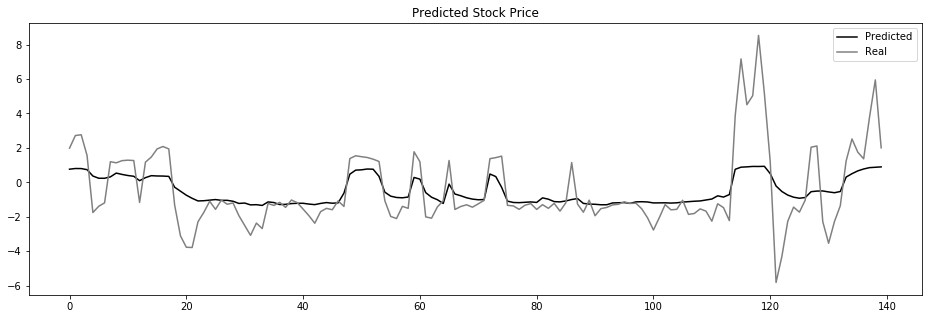

In [459]:
plt.subplots(figsize=(16,5))
plt.plot(range(y_train.shape[0]), model.predict(x=X_train).reshape(-1), label='Predicted', c='black')
plt.plot(range(y_train.shape[0]), y_train, label='Real', c='gray')
plt.title('Predicted Stock Price')
plt.legend()
plt.show()

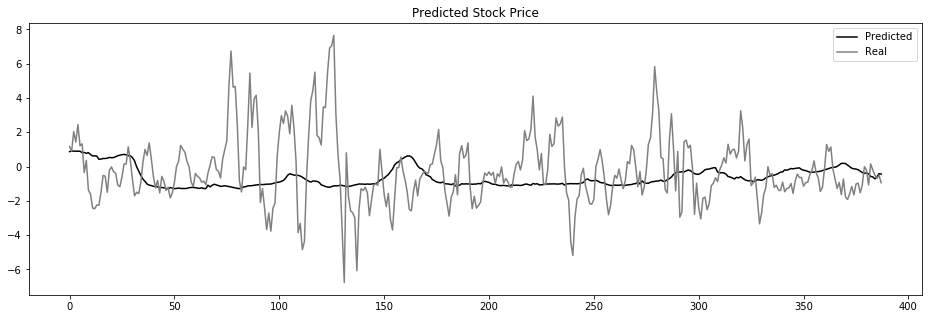

In [460]:
y_pred = model.predict(x=X_test).reshape(-1)
plt.subplots(figsize=(16,5))
plt.plot(range(y_test.shape[0]), y_pred, label='Predicted', c='black')
plt.plot(range(y_test.shape[0]), y_test, label='Real', c='gray')
plt.title('Predicted Stock Price')
plt.legend()
plt.show()

In [472]:
class BackTest(object):

    def __init__(self):
        self._hist = None
        self._strategy = []

    def load_history_price(self, hist_data):
        self._hist = hist_data

    def load_strategy(self, strategy_list):
        #strategy_list = []
        #stock = 0
        #flag = 1
        #for i in range(0, len(self._hist)-1):
        #    if self._hist[i] < self._hist[i+1]:
        #        if flag:
        #            strategy_list.append(100)
        #            stock += 100
        #            flag = 0
        #        else:
        #            strategy_list.append(0)
        #    else:
        #        flag = 1
        #        strategy_list.append(-stock)
        #        stock = 0
        #strategy_list.append(0)

        buy = 0
        pool = 0
        sell = 0

        no_act = 0
        for i in range(len(strategy_list)):
            self._strategy.append(((pool*self._hist[i]+sell)/buy-1)/(i+1-no_act)*365)
            pool += strategy_list[i]
            if strategy_list[i] > 0:
                buy += strategy_list[i] * self._hist[i]
            else:
                sell += -strategy_list[i] * self._hist[i]
            if strategy_list[i] == 0:
                no_act += 1

    def show_results(self):
        plt.subplots(figsize=(16,5))
        plt.plot(range(len(self._hist)), 
                 [(i/self._hist[0]-1)/(i+1)*365 for i in self._hist], 
                 label='Base', c='gray')
        plt.plot(range(len(self._hist)), 
                 self._strategy, 
                 label='Strategy', c='black')
        plt.ylim([-0.25, 0.25])
        plt.title('Back Test')
        plt.legend()
        plt.show()

def action(pred_y):
    strategy = []
    stock = 0
    flag = 1
    for i in pred_y:
        if i > 0:
            if flag:
                flag = 0
                strategy.append(100)
                stock += 100
            else:
                strategy.append(0)
        else:
            flag = 1
            strategy.append(-stock)
            stock -= 100
    return strategy

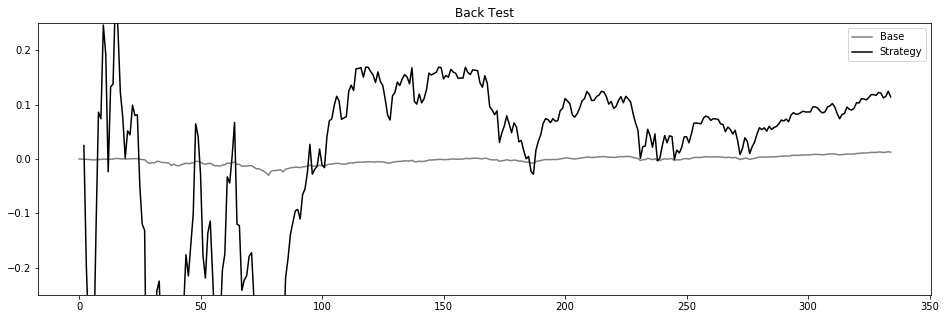

In [476]:
start = 500
X_all = np.array([pca.transform(scaler.transform(X))[i:i+need_num,:] for i in range(start, X.shape[0]-need_num)])
pred_y = model.predict(x=X_all).reshape(-1)
strategy = action(pred_y)
bt = BackTest()
bt.load_history_price(df_inputs.close.values[start + need_num:])
bt.load_strategy(strategy)
bt.show_results()